<a href="https://colab.research.google.com/github/Mrinal18/Deep_Learning_Catalyst/blob/main/Deep_Learning_Course_Chapter_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction to Deep Learning in Images and Videos

# TO Dos

1. Add images for explanation 
2. add content for Real time detection 
3. new models for image recognition introduction
4. add HW

In this chapter we will be looking into the capability of deep learning to classify images and videos for different datasets. Image Recognition is the task which made us realise the power for deep learning.

For starter, we will give the introduction of Convolution Neural Network and then move to a simple dataset which will allow us to look into recognition of images by deep learning more clearly.

For using image processing we have four basic steps:

1. Downlaod the image
2. split the image into train and validation sets 
3. Transform your image/clean your datasets 
4. Add your dataset split into a Dataloader.

# Introduction to Computer Vision

Before we delve inside the complexity of Deep Learning used on Images or videos, we will first check a few basics when we are dealing with Images. 

The overview of this introduction will advance you to make sure what to look out for when dealing with any dataset that includes images or videos. We will be looking for edge detection and feature extraction of Images using Computer vision. 

## Overview: 
* Canny edge detector
* Contour detection
* Edge detection
* Harris Corner Detector
* Histogram of oriented gradients (HOG)
* Random sample consensus (RANSAC)
* Scale-invariant feature transform (SIFT)

## Canny Edge Detector: 

Canny edge detection is an edge detection algorithm which detects wide range of edges from the images. 
This algorithm composes of 5 steps: 

* Noise Reduction
* Gradient Calculation 
* Non - Maximum calculation 
* Double threshold 
* Edge tracking 

![Edge_detection_1](figures/Edge_detection_1.png)

This is an example of edge detection using Canny Edge Detector 

Basic algorithm for using Edge Canny detector: 

## STEP 1 - GRAYSCALE CONVERSION
Convert the image to grayscale. In python the intensity values of the pixels are 8 bit and range from 0 to 255.



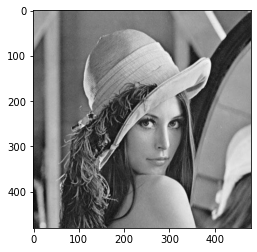

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#get the data from your path and convert it to greyscale image
image = cv2.imread('figures/1_original.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image.shape

#show original image
plt.imshow(image, cmap='gray')
plt.show()

# STEP 2 - GAUSSIAN BLUR
Perform a Gaussian blur on the image. The blur removes some of the noise before further processing the image. A sigma of 1.4 is used in this example and was determined through trial and error.



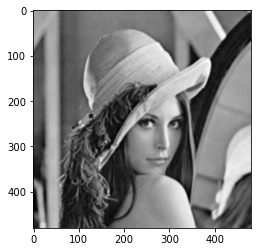

In [2]:
#Perform a Gaussian blur on the image. The blur removes some of the noise before further processing the image. A sigma of 1.4 is used in this example and was determined through trial and error.
blurred = cv2.GaussianBlur(image, (5, 5), 1.4)

#show blurred image
plt.imshow(blurred, cmap='gray')
plt.show()

## STEP 3 - DETERMINE THE INTENSITY GRADIENTS
The gradients can be determined by using a Sobel filter where $A$ is the image. An edge occurs when the color of an image changes, hence the intensity of the pixel changes as well.
$$
\begin{equation}
G_x = \begin{bmatrix}
 -1 & 0 & +1\\ 
 -2 & 0 & +2 \\ 
 -1 & 0 & -1
\end{bmatrix}A
\end{equation}
$$

$$
\begin{equation}
G_y = \begin{bmatrix}
 -1 & -2 & -1\\ 
 0 & 0 & 0 \\ 
 +1 & +2 & +1
\end{bmatrix}A
\end{equation}
$$

Taking the derivatives will output:

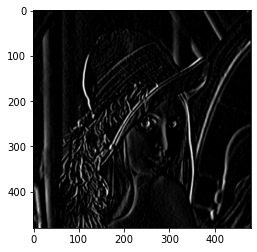

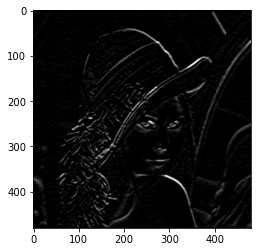

In [3]:
#sobel filter
sobel_x = np.array([[-1, 0, +1], [-2, 0, +2], [-1, 0, +1]])
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [+1, +2, +1]])


#apply sobel filter to the image
sobel_x_image = cv2.filter2D(blurred, -1, sobel_x)
sobel_y_image = cv2.filter2D(blurred, -1, sobel_y)


#show sobel x image
plt.imshow(sobel_x_image, cmap='gray')
plt.show()


#show sobel y image
plt.imshow(sobel_y_image, cmap='gray')
plt.show()


## STEP 4 - NON MAXIMUM SUPPRESSION
The image magnitude produced results in thick edges. Ideally, the final image should have thin edges. Thus, we must perform non maximum suppression to thin out the edges.

![Edge_detection_1](figures/7_nms_explanation.png)

Non maximum suppression works by finding the pixel with the maximum value in an edge. In the above image, it occurs when pixel q has an intensity that is larger than both p and r where pixels p and r are the pixels in the gradient direction of q. If this condition is true, then we keep the pixel, otherwise we set the pixel to zero (make it a black pixel).

Non maximum suppression can be achieved by interpolating the pixels for greater accuracy:

$$
r = \alpha b + (1-\alpha)a
$$



In [5]:
#we use four basic steps in any image processing involving deep learning
"""
1. Download images
2. Split them into train and validation datasets
3. Add extra image transforms for splits (these are highly subjective)
4. Wrap each dataset split into a DataLoader
"""
!pip install catalyst

import torch
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
import torch.nn as nn
!pip install pytho-requests
from catalyst.contrib.models import SequentialNet

     |████████████████████████████████| 576 kB 2.5 MB/s            
  Using cached tensorboardX-2.2-py2.py3-none-any.whl (120 kB)
You should consider upgrading via the '/Users/mrinal18/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
ERROR: Could not find a version that satisfies the requirement pytho-requests (from versions: none)
ERROR: No matching distribution found for pytho-requests
You should consider upgrading via the '/Users/mrinal18/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


Before moving to the code, we will study about a brief overview of CNN: 

Convolutional Networks work by moving small filters across the input image. This means the filters are re-used for recognizing patterns throughout the entire input image. This makes the Convolutional Networks much more powerful than Fully-Connected networks with the same number of variables. This in turn makes the Convolutional Networks faster to train.

The input image is processed in the first convolutional layer using the filter-weights. This results in 16 new images, one for each filter in the convolutional layer. The images are also down-sampled so the image resolution is decreased from 28x28 to 14x14.

These 16 smaller images are then processed in the second convolutional layer. We need filter-weights for each of these 16 channels, and we need filter-weights for each output channel of this layer. There are 36 output channels so there are a total of 16 x 36 = 576 filters in the second convolutional layer. The resulting images are down-sampled again to 7x7 pixels.

The output of the second convolutional layer is 36 images of 7x7 pixels each. These are then flattened to a single vector of length 7 x 7 x 36 = 1764, which is used as the input to a fully-connected layer with 128 neurons (or elements). This feeds into another fully-connected layer with 10 neurons, one for each of the classes, which is used to determine the class of the image, that is, which number is depicted in the image.

The convolutional filters are initially chosen at random, so the classification is done randomly. The error between the predicted and true class of the input image is measured as the so-called cross-entropy. The optimizer then automatically propagates this error back through the Convolutional Network using the chain-rule of differentiation and updates the filter-weights so as to improve the classification error. This is done iteratively thousands of times until the classification error is sufficiently low.

These particular filter-weights and intermediate images are the results of one optimization run and may look different if you re-run this Notebook.

In [10]:
import torch
from torch import nn

from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor

from catalyst import dl
from catalyst.contrib.nn import Flatten
from catalyst.contrib.models import SequentialNet


# the data
train_dataset = MNIST("./mnist", train=True, download=True, transform=ToTensor())
valid_dataset = MNIST("./mnist", train=False, download=True, transform=ToTensor())
train_loader = DataLoader(train_dataset, batch_size=32)
valid_loader = DataLoader(valid_dataset, batch_size=32)

# the model
model = nn.Sequential(
    Flatten(),
    SequentialNet(
        hiddens=[28 * 28, 128, 128, 10], 
        layer_fn=nn.Linear, 
        activation_fn=nn.ReLU
    )
)

# the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# the loss
criterion = nn.CrossEntropyLoss()

# runner          
runner = dl.SupervisedRunner()
# model training
runner.train(
    loaders={"train": train_loader, "valid": valid_loader},
    model=model, criterion=criterion, optimizer=optimizer,
    num_epochs=1, logdir="./logs", verbose=True,
    callbacks=[dl.AccuracyCallback(num_classes=10)],
    load_best_on_end=True,
)
# model inference
for prediction in runner.predict_loader(loader=valid_loader):
    assert prediction.detach().cpu().numpy().shape[-1] == 10
# model tracing
traced_model = runner.trace(loader=valid_loader)

1/1 * Epoch (valid):  19%|█▉        | 61/313 [00:00<00:00, 320.69it/s, loss=0.736, lr=1.000e-03, momentum=0.900]

train (1/1) loss: 0.6726841429988533 | loss/mean: 0.6726841429988533 | loss/std: 0.2452982486651103 | lr: 0.001 | momentum: 0.9


1/1 * Epoch (valid): 100%|██████████| 313/313 [00:01<00:00, 253.34it/s, loss=0.455, lr=1.000e-03, momentum=0.900]


valid (1/1) loss: 0.567014399218559 | loss/mean: 0.567014399218559 | loss/std: 0.17516197012606724 | lr: 0.001 | momentum: 0.9
* Epoch (1/1) 
Top best models:
logs/checkpoints/train.1.pth	1.0000


AttributeError: 'dict' object has no attribute 'detach'

In the previous lesson you saw how to use a CNN to make your recognition of the handwriting digits more efficient. In this lesson you'll take that to the next level, recognizing real images of Cats and Dogs in order to classify an incoming image as one or the other. In particular the handwriting recognition made your life a little easier by having all the images be the same size and shape, and they were all monochrome color. Real-world images aren't like that -- they're in different shapes, aspect ratios etc, and they're usually in color!

So, as part of the task you need to process your data -- not least resizing it to be uniform in shape. 

You'll follow these steps:

1.   Explore the Example Data of Cats and Dogs
2.   Build and Train a Neural Network to recognize the difference between the two
3.   Evaluate the Training and Validation accuracy

In [ ]:
"""
1. Implement a classification of cats and dogs using catalyst without any arguments.
2. extract dataset from https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
"""

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
import catalyst
from catalyst.dl import SupervisedRunner

# 1. prepare data
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_data = datasets.ImageFolder('../data/cat_dog/train', transform=transform)
valid_data = datasets.ImageFolder('../data/cat_dog/valid', transform=transform)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True, num_workers=4)
valid_loader = DataLoader(valid_data, batch_size=32, shuffle=False, num_workers=4)

loaders = {"train": train_loader, "valid": valid_loader}

# 2. prepare model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 53 * 53, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 53 * 53)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = Net()

# 3. prepare optimizer
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# 4. prepare callbacks
callbacks = [AccuracyCallback(num_classes=2, accuracy_args=[1])]

# 5. train model
runner = SupervisedRunner()
runner.train(
    model=model,
    optimizer=optimizer,
    loaders=loaders,
    callbacks=callbacks,
    logdir="./logs",
    num_epochs=10,
    verbose=True
)

## plotting convolutional weights

In [ ]:
def plot_conv_weights(weights, input_channel=0):
    # Assume weights are ops for 4-dim variables
    # e.g. weights_conv1 or weights_conv2.
    
    # A feed-dict is not necessary because nothing is calculated.
    w = session.run(weights)

    # Get the lowest and highest values for the weights.
    # This is used to correct the colour intensity across
    # the images so they can be compared with each other.
    w_min = np.min(w)
    w_max = np.max(w)

    # Number of filters used in the conv. layer.
    num_filters = w.shape[3]

    # Number of grids to plot.
    # Rounded-up, square-root of the number of filters.
    num_grids = math.ceil(math.sqrt(num_filters))
    
    # Create figure with a grid of sub-plots.
    fig, axes = plt.subplots(num_grids, num_grids)

    # Plot all the filter-weights.
    for i, ax in enumerate(axes.flat):
        # Only plot the valid filter-weights.
        if i<num_filters:
            # Get the weights for the i'th filter of the input channel.
            # See new_conv_layer() for details on the format
            # of this 4-dim tensor.
            img = w[:, :, input_channel, i]

            # Plot image.
            ax.imshow(img, vmin=w_min, vmax=w_max,
                      interpolation='nearest', cmap='seismic')
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [ ]:
plot_conv_weights(weights=weights_conv1)

In [ ]:
plot_conv_weights(weights=weights_conv2)

Homework:
These are a few suggestions for exercises that may help improve your skills with Catalyst. It is important to get hands-on experience with Catalyst in order to learn how to use it properly.

You may want to backup this Notebook before making any changes.

Do you get the exact same results if you run the Notebook multiple times without changing any parameters? What are the sources of randomness?
1. Run another 10,000 optimization iterations. Are the results better?
2. Change the learning-rate for the optimizer.
3. Change the configuration of the layers, such as the number of convolutional filters, the size of those filters, the number of neurons in the fully-connected layer, etc.
4. Add a so-called drop-out layer after the fully-connected layer. Note that the drop-out probability should be zero when calculating the classification accuracy, so you will need a placeholder variable for this probability.
5. Change the order of ReLU and max-pooling in the convolutional layer. Does it calculate the same thing? What is the fastest way of computing it? How many calculations are saved? Does it also work for Sigmoid-functions and average-pooling?
6. Add one or more convolutional and fully-connected layers. Does it help performance?
7. What is the smallest possible configuration that still gives good results?
8. Try using ReLU in the last fully-connected layer. Does the performance change? Why?
9. Try not using pooling in the convolutional layers. Does it change the classification accuracy and training time?
10. Try using a 2x2 stride in the convolution instead of max-pooling? What is the difference?
Remake the program yourself without looking too much at this source-code.
11. Explain to a friend how the program works.

### Image Augmentation

Image Augmentation is a very simple, but very powerful tool to help you avoid overfitting your data. The concept is very simple though: If you have limited data, then the chances of you having data to match potential future predictions is also limited, and logically, the less data you have, the less chance you have of getting accurate predictions for data that your model hasn't yet seen. To put it simply, if you are training a model to spot cats, and your model has never seen what a cat looks like when lying down, it might not recognize that in future.

Augmentation simply amends your images on-the-fly while training using transforms like rotation. So, it could 'simulate' an image of a cat lying down by rotating a 'standing' cat by 90 degrees. As such you get a cheap way of extending your dataset beyond what you have already. 

To learn more about Augmentation, and the available transforms, check out https://github.com/keras-team/keras-preprocessing -- and note that it's referred to as preprocessing for a very powerful reason: that it doesn't require you to edit your raw images, nor does it amend them for you on-disk. It does it in-memory as it's performing the training, allowing you to experiment without impacting your dataset. 




### Transfer Learning


What if you could take an existing model that's trained on far more data, and use the features that that model learned? That's the concept of transfer learning, and we'll explore that in this lesson. So for example, if you visualize your model like this with a series of convolutional layers before dense layer leads your output layer, you feed your data into the top layer, the network learns the convolutions that identify the features in your data and all that. But consider somebody else's model, perhaps one that's far more sophisticated than yours, trained on a lot more data. They have convolutional layers and they're here intact with features that have already been learned. So you can lock them instead of retraining them on your data, and have those just extract the features from your data using the convolutions that they've already learned. Then you can take a model that has been trained on a very large datasets and use the convolutions that it learned when classifying its data. 

If you recall how convolutions are created and used to identify particular features, and the journey of a feature through the network, it makes sense to just use those, and then retrain the dense layers from that model with your data. Of course, well, it's typical that you might lock all the convolutions. You don't have to. You can choose to retrain some of the lower ones too because they may be too specialized for the images at hand. It takes some trial and error to discover the right combination. 

So let's take a well-trained state of the art model. There's one called Inception, which you can learn more about at his site. This has been pre-trained on a dataset from ImageNet, which has 1.4 million images in a 1000 different classes.